In [ ]:
import torch
X = torch.Tensor(2,3)

In [ ]:
X = torch.tensor([[1,2,3],[4,5,6]])

In [ ]:
X

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
x_tensor = torch.tensor(data=[2.0,3.0], requires_grad=True)

In [ ]:
import torch

x = torch.tensor(data=[2.0,3.0], requires_grad=True)
y = x**2
z = 2*y + 3

target = torch.tensor([3.0,4.0])
loss = torch.sum(torch.abs(z-target))
loss.backward()

In [ ]:
print(x.grad, y.grad, z.grad)

tensor([ 8., 12.]) None None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  """Entry point for launching an IPython kernel.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [ ]:
num_data = 1000
num_epoch = 500

x = init.uniform_(torch.Tensor(num_data,1),-10,10)
noise = init.normal_(torch.FloatTensor(num_data,1),std=1)
y = 2*x+3
y_noise = y + noise

In [ ]:
model = nn.Linear(1,1)
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr=0.01)
label = y_noise

In [ ]:
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)

    loss = loss_func(output,label)
    loss.backward()
    optimizer.step()

    if i%10 ==0:
        print(loss.data)
        param_list = list(model.parameters())
        print(param_list[0].item(), param_list[1].item())

tensor(9.7489)
0.149781733751297 0.08490759134292603
tensor(7.3937)
0.6340231895446777 0.10150759667158127
tensor(5.1949)
1.0998122692108154 0.12546759843826294
tensor(3.5138)
1.4998524188995361 0.16702759265899658
tensor(2.8509)
1.7214981317520142 0.2373676300048828
tensor(2.7015)
1.7979215383529663 0.3268876373767853
tensor(2.5924)
1.8431273698806763 0.42036768794059753
tensor(2.4912)
1.8768281936645508 0.515007734298706
tensor(2.3919)
1.9062000513076782 0.610187828540802
tensor(2.2942)
1.9308934211730957 0.7058278322219849
tensor(2.1975)
1.9525713920593262 0.8016678690910339
tensor(2.1021)
1.9703341722488403 0.8976877927780151
tensor(2.0084)
1.9830948114395142 0.993527889251709
tensor(1.9162)
1.9931172132492065 1.0889077186584473
tensor(1.8280)
1.999795913696289 1.1824278831481934
tensor(1.7443)
2.003572940826416 1.2736679315567017
tensor(1.6632)
2.007129430770874 1.3635079860687256
tensor(1.5850)
2.00883412361145 1.4517879486083984
tensor(1.5090)
2.0095365047454834 1.53894805908203

In [ ]:
num_data = 1000
num_epoch = 10000

noise = init.normal_(torch.FloatTensor(num_data,1),std=1)
x = init.uniform_(torch.Tensor(num_data,1),-15,15)
y = (x**2) + 3
y_noise = y+noise

model = nn.Sequential(
    nn.Linear(1,6),
    nn.ReLU(),
    nn.Linear(6,10),
    nn.ReLU(),
    nn.Linear(10,6),
    nn.ReLU(),
    nn.Linear(6,1),
)

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr =0.0002)
loss_array = []

for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    loss = loss_func(output,y_noise)
    loss.backward()
    optimizer.step()

    loss_array.append(loss)
    

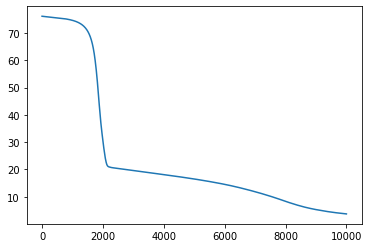

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_array)
plt.show()